In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

DATOS

In [3]:
peliculas = pd.read_csv('./Dataset/Peliculas_plataforma.csv', sep=';')
peliculas

,ID,Title,Year,Age,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,Type,Directors,Genres,Country,Language,Runtime,Plataforma
0,1,Inception,2010,13,8.8,87 %,1,0,0,0,0,Christopher Nolan,Action,United States,English,148.0,Netflix
1,2,The Matrix,1999,18,8.7,87 %,1,0,0,0,0,Lana Wachowski,Sci-Fi,United States,English,136.0,Netflix
2,3,Avengers: Infinity War,2018,13,8.5,84 %,1,0,0,0,0,Anthony Russo,Action,United States,English,149.0,Netflix
3,4,Back to the Future,1985,7,8.5,96 %,1,0,0,0,0,Robert Zemeckis,Adventure,United States,English,116.0,Netflix
4,5,The Good; the Bad and the Ugly,1966,18,8.8,97 %,1,0,1,0,0,Sergio Leone,Western,Italy,Italian,161.0,Prime Video
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16739,16740,The Ghosts of Buxley Hall,1980,NaN,6.2,NaN,0,0,0,1,0,Bruce Bilson,Comedy,United States,English,120.0,Disney+
16740,16741,The Poof Point,2001,7,4.7,NaN,0,0,0,1,0,Neal Israel,Comedy,United States,English,90.0,Disney+
16741,16742,Sharks of Lost Island,2013,NaN,5.7,NaN,0,0,0,1,0,Neil Gelinas,Documentary,United States,English,NaN,Disney+
16742,16743,Man Among Cheetahs,2017,NaN,6.6,NaN,0,0,0,1,0,Richard Slater-Jones,Documentary,United States,English,NaN,Disney+


In [4]:
peliculas.describe()

,ID,Year,IMDb,Netflix,Hulu,Prime Video,Disney+,Type,Runtime
count,16744.000000,16744.000000,16173.000000,16744.000000,16744.000000,16744.000000,16744.000000,16744.0,16152.000000
mean,8372.500000,2003.014035,5.902751,0.212613,0.053930,0.737817,0.033684,0.0,93.413447
std,4833.720789,20.674321,1.347867,0.409169,0.225886,0.439835,0.180419,0.0,28.219222
min,1.000000,1902.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,1.000000
25%,4186.750000,2000.000000,5.100000,0.000000,0.000000,0.000000,0.000000,0.0,82.000000
50%,8372.500000,2012.000000,6.100000,0.000000,0.000000,1.000000,0.000000,0.0,92.000000
75%,12558.250000,2016.000000,6.900000,0.000000,0.000000,1.000000,0.000000,0.0,104.000000
max,16744.000000,2020.000000,9.300000,1.000000,1.000000,1.000000,1.000000,0.0,1256.000000


DROPS

In [5]:
pelisdrop = peliculas.drop(columns=["ID","Netflix","Hulu","Prime Video","Disney+","Type","Directors","Country","Language","Plataforma"])
pelisdrop

,Title,Year,Age,IMDb,Rotten Tomatoes,Genres,Runtime
0,Inception,2010,13,8.8,87 %,Action,148.0
1,The Matrix,1999,18,8.7,87 %,Sci-Fi,136.0
2,Avengers: Infinity War,2018,13,8.5,84 %,Action,149.0
3,Back to the Future,1985,7,8.5,96 %,Adventure,116.0
4,The Good; the Bad and the Ugly,1966,18,8.8,97 %,Western,161.0
...,...,...,...,...,...,...,...
16739,The Ghosts of Buxley Hall,1980,NaN,6.2,NaN,Comedy,120.0
16740,The Poof Point,2001,7,4.7,NaN,Comedy,90.0
16741,Sharks of Lost Island,2013,NaN,5.7,NaN,Documentary,NaN
16742,Man Among Cheetahs,2017,NaN,6.6,NaN,Documentary,NaN


In [6]:
pelisdrop["year"]=pd.to_datetime(pelisdrop["Year"], format='%Y', errors='ignore')
pelisdrop["year"]

0       2010-01-01
1       1999-01-01
2       2018-01-01
3       1985-01-01
4       1966-01-01
           ...    
16739   1980-01-01
16740   2001-01-01
16741   2013-01-01
16742   2017-01-01
16743   1950-01-01
Name: year, Length: 16744, dtype: datetime64[ns]

In [7]:
pelisdrop.index = pelisdrop["year"]
pelisdrop.head(5)

,Title,Year,Age,IMDb,Rotten Tomatoes,Genres,Runtime,year
year,,,,,,,,
2010-01-01,Inception,2010,13,8.8,87 %,Action,148.0,2010-01-01
1999-01-01,The Matrix,1999,18,8.7,87 %,Sci-Fi,136.0,1999-01-01
2018-01-01,Avengers: Infinity War,2018,13,8.5,84 %,Action,149.0,2018-01-01
1985-01-01,Back to the Future,1985,7,8.5,96 %,Adventure,116.0,1985-01-01
1966-01-01,The Good; the Bad and the Ugly,1966,18,8.8,97 %,Western,161.0,1966-01-01


In [8]:
data_explode=pelisdrop.explode("Genres")
data_explode.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 16744 entries, 2010-01-01 to 1950-01-01
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Title            16744 non-null  object        
 1   Year             16744 non-null  int64         
 2   Age              7354 non-null   object        
 3   IMDb             16173 non-null  float64       
 4   Rotten Tomatoes  5158 non-null   object        
 5   Genres           16542 non-null  object        
 6   Runtime          16152 non-null  float64       
 7   year             16744 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 1.1+ MB


In [9]:
data_explode_g=data_explode.explode("Genres")
data_explode_g.head(5)

,Title,Year,Age,IMDb,Rotten Tomatoes,Genres,Runtime,year
year,,,,,,,,
2010-01-01,Inception,2010,13,8.8,87 %,Action,148.0,2010-01-01
1999-01-01,The Matrix,1999,18,8.7,87 %,Sci-Fi,136.0,1999-01-01
2018-01-01,Avengers: Infinity War,2018,13,8.5,84 %,Action,149.0,2018-01-01
1985-01-01,Back to the Future,1985,7,8.5,96 %,Adventure,116.0,1985-01-01
1966-01-01,The Good; the Bad and the Ugly,1966,18,8.8,97 %,Western,161.0,1966-01-01


In [10]:
#buscamos datos de la calificación de IMDB
data_explode_g["IMDb"].isnull().sum()

571

In [11]:
#buscamos datos nulos de generos
pelisdrop["Genres"].value_counts().head(20)

Comedy         3358
Drama          3284
Documentary    2533
Action         2490
Horror         1116
Crime           832
Animation       694
Adventure       613
Biography       414
Thriller        241
Short           176
Family          172
Western         121
Mystery         100
Romance          93
Sci-Fi           88
Fantasy          76
Music            43
Musical          29
Sport            14
Name: Genres, dtype: int64

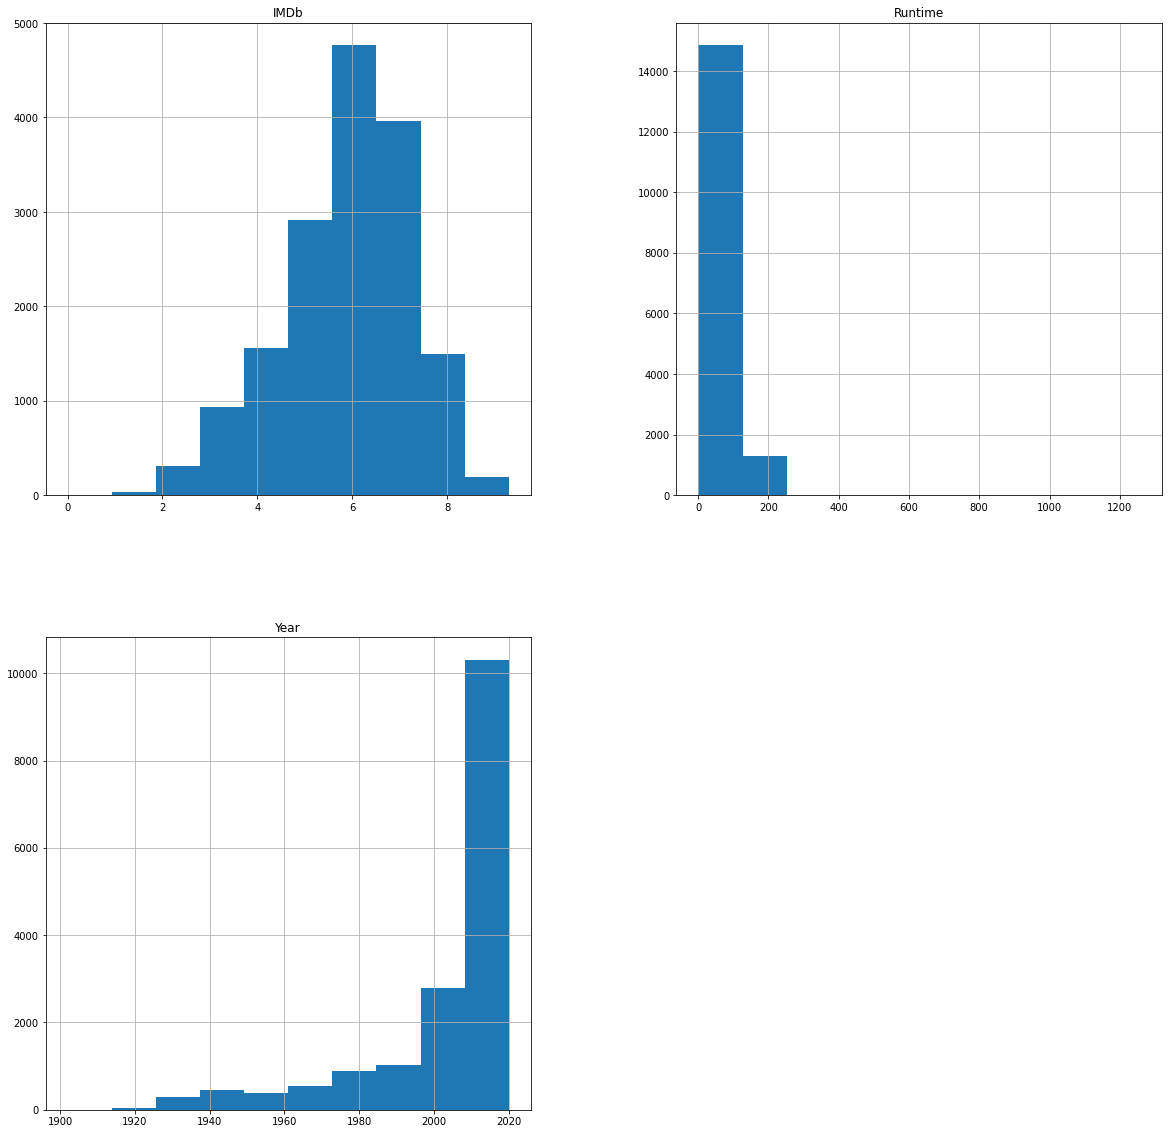

In [12]:
##Sacamos graficas de crecimiento de IMDB, lanzamiento agregado de conetido y acumulación de tiempo
pelisdrop.hist(figsize = (20,20))
plt.show()

In [13]:
#buscamos las peliculas más populares según IMDb
máspopulares = peliculas.groupby('Title')['IMDb'].sum().sort_values(ascending=False).head(10)
máspopulares


Title
Square One                                               9.3
My Next Guest with David Letterman and Shah Rukh Khan    9.3
Down; But Not Out!                                       9.3
Steven Banks: Home Entertainment Center                  9.3
Bounty                                                   9.3
Love on a Leash                                          9.3
Natsamrat                                                9.1
Where's Daddy?                                           9.1
Finding Family                                           9.1
Escape from Firebase Kate                                9.0
Name: IMDb, dtype: float64